In [259]:
import pandas as pd

import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame, Panel
from collections import Counter

In [4]:
clicked_impressions_df = pd.read_csv(
    '20170601_joined_impressions.csv.gz', sep=',', compression='gzip', 
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

In [98]:
train = clicked_impressions_df.fillna(0)
train.columns

Index(['frontPageViewId', 'contentPosition', 'impressionTimestamp',
       'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked'],
      dtype='object')

### REMOVE NOISE DATA

In [224]:
frontpage = list(set(train["frontPageViewId"].values.tolist()))

In [225]:
try3 = train.groupby(['frontPageViewId','contentPosition'])['impressionTimestamp'].transform(max) == train["impressionTimestamp"]

In [226]:
result = train[try3]

In [227]:
result

,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked
0,0,0,2017-06-01 18:17:27,3AyoA,0,1970-01-01 00:00:00,0
1,0000051c-784a-4103-a30e-61c743218977,8,2017-06-01 15:09:23,26r1x,0,1970-01-01 00:00:00,0
2,0000051c-784a-4103-a30e-61c743218977,9,2017-06-01 15:09:21,yAAMA,0,1970-01-01 00:00:00,0
3,0000051c-784a-4103-a30e-61c743218977,10,2017-06-01 15:09:21,vRLqm,0,1970-01-01 00:00:00,0
4,0000051c-784a-4103-a30e-61c743218977,11,2017-06-01 15:09:35,OxdE3,0,1970-01-01 00:00:00,0
5,0000051c-784a-4103-a30e-61c743218977,12,2017-06-01 15:09:37,VA4Mr,0,1970-01-01 00:00:00,0
6,0000051c-784a-4103-a30e-61c743218977,13,2017-06-01 15:09:37,OKKXk,0,1970-01-01 00:00:00,0
7,0000051c-784a-4103-a30e-61c743218977,14,2017-06-01 15:09:39,VAA36,0,1970-01-01 00:00:00,0
8,0000051c-784a-4103-a30e-61c743218977,15,2017-06-01 15:09:43,97Rmr,301bec19-12c3-45c1-afca-f14494d51a5e,2017-06-01 15:09:53,1
9,00001212-9021-41c4-8280-95712083b45b,0,2017-06-01 20:56:59,MyKpE,0,1970-01-01 00:00:00,0


In [228]:
processtrain = result.drop_duplicates(['frontPageViewId','contentPosition','impressionTimestamp'], keep='last')

In [229]:
processtrain

,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked
0,0,0,2017-06-01 18:17:27,3AyoA,0,1970-01-01 00:00:00,0
1,0000051c-784a-4103-a30e-61c743218977,8,2017-06-01 15:09:23,26r1x,0,1970-01-01 00:00:00,0
2,0000051c-784a-4103-a30e-61c743218977,9,2017-06-01 15:09:21,yAAMA,0,1970-01-01 00:00:00,0
3,0000051c-784a-4103-a30e-61c743218977,10,2017-06-01 15:09:21,vRLqm,0,1970-01-01 00:00:00,0
4,0000051c-784a-4103-a30e-61c743218977,11,2017-06-01 15:09:35,OxdE3,0,1970-01-01 00:00:00,0
5,0000051c-784a-4103-a30e-61c743218977,12,2017-06-01 15:09:37,VA4Mr,0,1970-01-01 00:00:00,0
6,0000051c-784a-4103-a30e-61c743218977,13,2017-06-01 15:09:37,OKKXk,0,1970-01-01 00:00:00,0
7,0000051c-784a-4103-a30e-61c743218977,14,2017-06-01 15:09:39,VAA36,0,1970-01-01 00:00:00,0
8,0000051c-784a-4103-a30e-61c743218977,15,2017-06-01 15:09:43,97Rmr,301bec19-12c3-45c1-afca-f14494d51a5e,2017-06-01 15:09:53,1
9,00001212-9021-41c4-8280-95712083b45b,0,2017-06-01 20:56:59,MyKpE,0,1970-01-01 00:00:00,0


In [232]:
newprocess = processtrain.groupby(['frontPageViewId','contentPosition']).last()


In [233]:
newprocess

impressionTimestamp  \
frontPageViewId                      contentPosition                       
0                                    0               2017-06-01 18:17:27   
0000051c-784a-4103-a30e-61c743218977 8               2017-06-01 15:09:23   
                                     9               2017-06-01 15:09:21   
                                     10              2017-06-01 15:09:21   
                                     11              2017-06-01 15:09:35   
                                     12              2017-06-01 15:09:37   
                                     13              2017-06-01 15:09:37   
                                     14              2017-06-01 15:09:39   
                                     15              2017-06-01 15:09:43   
00001212-9021-41c4-8280-95712083b45b 0               2017-06-01 20:56:59   
000018ba-3861-40c2-9649-af74988987e2 0               2017-06-01 07:47:19   
                                     1               2017-06-01 07:47:19   
                                     2               2017-06-01 07:47:19   
                                     3               2017-06-01 07:47:19   
                                     4               2017-06-01 07:47:32   
                                     5               2017-06-01 07:47:32   
                                     6               2017-06-01 07:47:32   
                                     7               2017-06-01 07:47:46   
                                     8               2017-06-01 07:47:46   
                                     9               2017-06-01 07:47:46   
                                     10              2017-06-01 07:47:54   
                                     11              2017-06-01 07:47:50   
                                     12              2017-06-01 07:48:00   
                                     15              2017-06-01 07:48:14   
                                     16              2017-06-01 07:48:14   
                                     18              2017-06-01 07:48:18   
                                     19              2017-06-01 07:48:18   
                                     20              2017-06-01 07:48:20   
                                     21              2017-06-01 07:48:20   
                                     22              2017-06-01 07:48:22   
...                                                                  ...   
ffffb937-c3b3-4ff8-b21a-183ad98fd8a9 45              2017-06-01 10:18:12   
                                     46              2017-06-01 10:18:12   
                                     47              2017-06-01 10:18:14   
                                     48              2017-06-01 10:18:48   
                                     49              2017-06-01 10:18:48   
                                     50              2017-06-01 10:18:50   
                                     51              2017-06-01 10:18:50   
                                     52              2017-06-01 10:18:52   
                                     53              2017-06-01 10:18:54   
                                     54              2017-06-01 10:18:56   
                                     55              2017-06-01 10:18:56   
                                     56              2017-06-01 10:18:58   
                                     57              2017-06-01 10:18:58   
                                     58              2017-06-01 10:19:00   
                                     59              2017-06-01 10:19:00   
                                     60              2017-06-01 10:19:02   
                                     61              2017-06-01 10:19:08   
ffffc181-8af8-486e-9f8a-098744cc00d2 0               2017-06-01 09:13:37   
                                     1               2017-06-01 09:13:42   
                                     2               2017-06-01 09:13:48   
                         

In [160]:
processtrain.to_csv("procestrainwithoutnoise.csv")

### LOAD THE PROCESSED DATA

In [234]:
nonzerotrain = processtrain[processtrain["IsClicked"] == 1]

In [235]:
nonzerotrain

,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked
8,0000051c-784a-4103-a30e-61c743218977,15,2017-06-01 15:09:43,97Rmr,301bec19-12c3-45c1-afca-f14494d51a5e,2017-06-01 15:09:53,1
67,000018ba-3861-40c2-9649-af74988987e2,66,2017-06-01 07:49:46,q97gz,4831dc91-86ee-4843-b0f3-0ad2025990bb,2017-06-01 07:49:55,1
85,0000473f-5045-4f1e-8624-424482af918a,18,2017-06-01 10:09:00,Wpr7a,b88e1cd4-be77-426c-8e35-4f8aeffd454c,2017-06-01 10:09:24,1
89,00006cfe-d207-4f74-a0fd-cbe771f0a1b2,0,2017-06-01 20:40:59,MyKpE,f72b1f61-c2ff-496c-929d-b9ef6f081468,2017-06-01 20:41:06,1
174,0000b2f8-369a-4e18-9ad3-9dbca1476842,4,2017-06-01 11:23:29,rxQq8,2e593149-156c-42ac-ba4d-03b0aa87c551,2017-06-01 11:23:34,1
433,00030c1b-9d14-4f41-a83a-8176f5d4b103,12,2017-06-01 11:14:24,VA4Mr,796f54b3-6add-40f9-87f7-12995191c1eb,2017-06-01 11:14:38,1
466,0003bb79-e5c4-4f0d-8452-ae0b0fa8af55,0,2017-06-01 21:06:19,kn71j,441c7c8d-8fb6-4ee5-8b3f-b0424af1a304,2017-06-01 21:06:26,1
527,0004585e-04d0-41ba-a24c-0dfb774c3562,9,2017-06-01 04:36:11,azA97,f919a6b3-1d50-4d9e-ade4-5bbf716cf2f0,2017-06-01 04:36:15,1
606,0004def3-60cb-46e3-b7cf-5ab25bfd6615,0,2017-06-01 20:46:08,MyKpE,2ced5f06-598e-495c-912a-d40798f0ae3a,2017-06-01 20:46:21,1
807,000634be-6d45-4352-ad6c-0b01403aaf03,11,2017-06-01 22:43:20,OxdE3,c2c38637-166f-4953-99c8-dcf3ca5dcaf6,2017-06-01 22:43:29,1


In [236]:
clicked_impressions_df[:10]

,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked
0,NaN,0,2017-06-01 18:17:27,3AyoA,NaN,NaT,0
1,0000051c-784a-4103-a30e-61c743218977,8,2017-06-01 15:09:23,26r1x,NaN,NaT,0
2,0000051c-784a-4103-a30e-61c743218977,9,2017-06-01 15:09:21,yAAMA,NaN,NaT,0
3,0000051c-784a-4103-a30e-61c743218977,10,2017-06-01 15:09:21,vRLqm,NaN,NaT,0
4,0000051c-784a-4103-a30e-61c743218977,11,2017-06-01 15:09:35,OxdE3,NaN,NaT,0
5,0000051c-784a-4103-a30e-61c743218977,12,2017-06-01 15:09:37,VA4Mr,NaN,NaT,0
6,0000051c-784a-4103-a30e-61c743218977,13,2017-06-01 15:09:37,OKKXk,NaN,NaT,0
7,0000051c-784a-4103-a30e-61c743218977,14,2017-06-01 15:09:39,VAA36,NaN,NaT,0
8,0000051c-784a-4103-a30e-61c743218977,15,2017-06-01 15:09:43,97Rmr,301bec19-12c3-45c1-afca-f14494d51a5e,2017-06-01 15:09:53,1
9,00001212-9021-41c4-8280-95712083b45b,0,2017-06-01 20:56:59,MyKpE,NaN,NaT,0


### set impressiontimestamp as index and the column called hour

In [237]:
try1 = nonzerotrain.set_index(pd.DatetimeIndex(nonzerotrain['impressionTimestamp']))


In [238]:
processtrain['time_hour'] = processtrain.impressionTimestamp.apply(lambda x: x.hour)

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [239]:
processtrain.columns

Index(['frontPageViewId', 'contentPosition', 'impressionTimestamp',
       'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
       'time_hour'],
      dtype='object')

In [240]:
train.to_csv("new_processdata2_withhour.csv")

In [242]:
data = processtrain[processtrain["IsClicked"] == 1]

In [243]:
result = data.groupby(["time_hour"])["contentId"].count()

In [244]:
hour_contentnumber = pd.DataFrame({"hour":list(result.keys()), "contentnumber":list(result)})

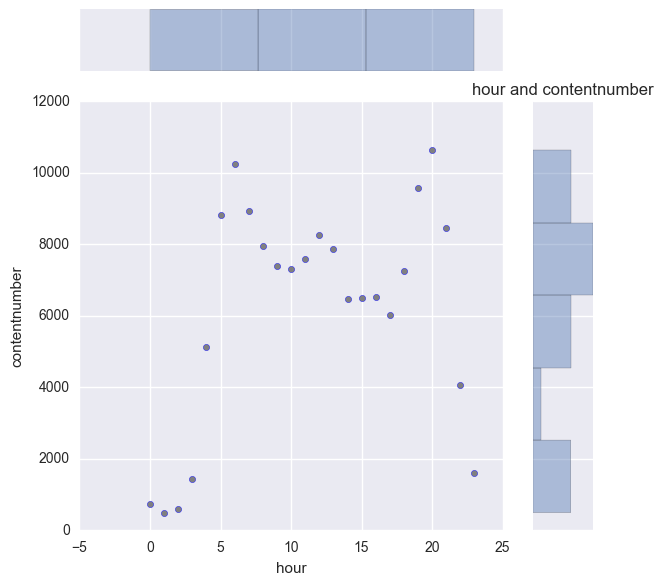

In [245]:
g=sns.JointGrid(x='hour',y='contentnumber',data = hour_contentnumber,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("hour and contentnumber")
#plt.savefig("hour_contentnumber.png")
plt.show()


### CACULATE THE DIFF TIME 　

In [246]:
abs(data["clickTimestamp"] - data['impressionTimestamp'])

8         00:00:10
67        00:00:09
85        00:00:24
89        00:00:07
174       00:00:05
433       00:00:14
466       00:00:07
527       00:00:04
606       00:00:13
807       00:00:09
930       00:00:20
955       00:00:04
961       00:00:12
994       00:02:26
1004      00:00:04
1034      00:00:26
1037      00:00:25
1308      00:00:03
1327      00:00:02
1369      00:00:39
1373      00:00:06
1376      00:00:09
1476      00:00:13
1640      00:00:08
1689      00:00:13
1699      00:00:51
1755      00:00:06
1775      00:00:28
1808      00:00:02
1941      00:00:06
            ...   
6830117   00:22:38
6830138   00:00:21
6830143   00:00:21
6830200   00:00:08
6830203   00:00:03
6830205   00:00:04
6830220   00:00:14
6830231   00:00:08
6830373   00:00:08
6830379   00:00:17
6830391   00:00:05
6830510   00:00:11
6830523   00:00:25
6830529   00:00:16
6830546   00:00:07
6830563   00:00:28
6830570   00:00:04
6830588   00:00:06
6830589   00:00:55
6830755   00:00:03
6830764   00:00:02
6830816   00

In [247]:
data["timediff"] =  list(abs(data["clickTimestamp"] - data['impressionTimestamp']))

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [248]:
group = data.groupby('frontPageViewId')

In [249]:
timemean = group.apply(lambda df: df.timediff.mean())

In [265]:
timemean

frontPageViewId
0000051c-784a-4103-a30e-61c743218977   00:00:10
000018ba-3861-40c2-9649-af74988987e2   00:00:09
0000473f-5045-4f1e-8624-424482af918a   00:00:24
00006cfe-d207-4f74-a0fd-cbe771f0a1b2   00:00:07
0000b2f8-369a-4e18-9ad3-9dbca1476842   00:00:05
00030c1b-9d14-4f41-a83a-8176f5d4b103   00:00:14
0003bb79-e5c4-4f0d-8452-ae0b0fa8af55   00:00:07
0004585e-04d0-41ba-a24c-0dfb774c3562   00:00:04
0004def3-60cb-46e3-b7cf-5ab25bfd6615   00:00:13
000634be-6d45-4352-ad6c-0b01403aaf03   00:00:09
000652d3-bd41-4028-aa51-8403f66b6ad3   00:00:20
00066653-a78b-473b-bfd0-8645568ca00b   00:00:04
0006a860-660b-4787-9753-2e7922bdce61   00:00:12
00072869-a9e0-4cea-b0b0-2492398a4031   00:02:26
00073a6a-6496-4709-91ca-13541976f7d3   00:00:04
000756e6-1c9b-4683-a94a-52050e93ce7e   00:00:26
00076227-19ed-47c5-861c-7884f099d2bb   00:00:25
00099b10-1368-4d8e-92cf-7f6da7f32e44   00:00:03
0009b241-8fe0-4980-9fed-88eaafb908fb   00:00:02
000a057c-fd9b-45b9-b9ff-430ef6e05033   00:00:39
000a7125-68fd-4269-b6b5-

In [250]:
result = timemean.describe()

In [263]:
processtrain.groupby('frontPageViewId')["contentId"].count()

frontPageViewId
0                                         1
0000051c-784a-4103-a30e-61c743218977      8
00001212-9021-41c4-8280-95712083b45b      1
000018ba-3861-40c2-9649-af74988987e2     59
0000222f-c8b5-406b-8980-a9daf2d37fa2      1
0000473f-5045-4f1e-8624-424482af918a     19
00006cfe-d207-4f74-a0fd-cbe771f0a1b2     38
00008d40-d25b-4ea7-9873-887246ab0679     43
0000b2f8-369a-4e18-9ad3-9dbca1476842      5
0000ca59-9bd2-4593-9a91-c84b220040ec      2
0000d0aa-58af-477b-9d3c-f5b6f58979a2      2
0000d0f6-b0e0-48e5-978c-6db48c3f6705     94
0000e09e-0711-4c45-ae37-4976aa0a479b      4
00015241-9b38-4909-af23-e97830fb021b      4
0001704f-37e1-42e3-9d63-84396f0357dd      4
0001cc3b-b199-45d1-8071-de86fe0f7178      2
0001e82e-91a8-4694-a73f-0b1040c54454      4
0001f59f-4373-45c7-bb18-58b61762f35b    103
00020443-c3fe-41d6-a2fa-550a15fb1960      1
000285d4-e85e-40fa-bfd1-3d0af49dfcd4     18
0002c081-14ed-4661-9afc-05fb0ae278a8     10
00030c1b-9d14-4f41-a83a-8176f5d4b103     13
00030e74-f47e-4c

In [257]:
order = data.groupby('frontPageViewId')["contentId"].count()

In [277]:
a = Counter(order)

In [279]:
a.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 21])

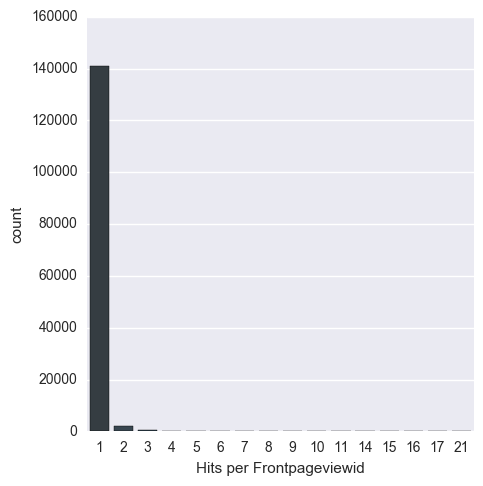

In [286]:
feature_df = pd.DataFrame()
feature_df["Features"] = list(a.keys())
feature_df["scores"] = list(a.values())
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.barplot(y="scores", x="Features", data = feature_df,palette="Blues_d", ax=ax)
plt.xlabel("Hits per Frontpageviewid")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("Hits_per_Frontpageviewid.png")
plt.show()

In [266]:
timediff_click = pd.DataFrame({"frontPageViewId":list(order.keys()),"clicktimes":list(order), "timediff": list(timemean) })

In [270]:
timediff_click.sort(columns= "clicktimes")

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,clicktimes,frontPageViewId,timediff
0,1,0000051c-784a-4103-a30e-61c743218977,00:00:10
95671,1,a92ea37a-15c4-464a-9f9d-d86fd4e8f17b,00:00:12
95670,1,a92e97cb-4483-43c4-8afe-40b6c1024dfb,00:00:15
95669,1,a92e1725-f20b-4533-8bca-983bb08dd676,01:32:11
95668,1,a92dc301-cc22-4999-adfd-a46549bc7152,00:00:06
95667,1,a92d8a54-5d23-4e71-b0da-25bb7e4d5e7e,00:00:03
95666,1,a92c703c-4853-44bd-a148-da4b15093654,00:00:13
95665,1,a92c6842-fff6-46d9-a265-2fb6e6d902f9,00:00:49
95664,1,a92c05f9-fda5-48a8-aca8-845f8251de42,00:00:08
95663,1,a92bbfa0-f184-495e-9d1e-0c0f172d0410,00:00:21


In [252]:
timemeandata = pd.DataFrame("")

pandas.core.series.Series